In [1]:
import pandas as pd
import json
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
colnames=['tweets', 'created_at', 'id', 'rt', 'lang', 'urls', 'Event']
df_relevant = pd.read_csv('clean_relevant_tweets.csv', header='infer')
df_clusters = pd.read_csv('temp13_8.csv',header='infer',engine='python')

In [3]:
colnames = ['Event','Category']
df_categories = pd.read_csv("event_categories.tsv",sep='\t',names=colnames,header=None)

In [4]:
temp_1 = pd.merge(df_relevant, df_categories, how='inner', on=['Event'])
temp_1.groupby(['Category']).count()

,tweets,created_at,id,rt,lang,urls,Event
Category,,,,,,,
Armed Conflicts & Attacks,5952,5952,5952,5952,5952,5952,5952
"Arts, Culture & Entertainment",8178,8178,8178,8178,8178,8178,8178
Business & Economy,3190,3190,3190,3190,3190,3190,3190
Disasters & Accidents,4612,4612,4612,4612,4612,4612,4612
"Law, Politics & Scandals",36892,36892,36892,36892,36892,36892,36892
Miscellaneous,4433,4433,4433,4433,4433,4433,4433
Science & Technology,1823,1823,1823,1823,1823,1823,1823
Sports,32674,32674,32674,32674,32674,32674,32674


In [5]:
temp_2 = pd.merge(df_clusters, df_categories, how='inner', on=['Event'])
temp_2.groupby(['Category']).count()

,tweets,Timestamp,Cluster,Event
Category,,,,
Armed Conflicts & Attacks,1013,1013,1013,1013
"Arts, Culture & Entertainment",4564,4564,4564,4564
Business & Economy,1043,1043,1043,1043
Disasters & Accidents,1752,1752,1752,1752
"Law, Politics & Scandals",12766,12766,12766,12766
Miscellaneous,2184,2184,2184,2184
Science & Technology,576,576,576,576
Sports,13381,13381,13381,13381


In [6]:
temp_2.groupby(['Category']).count()['tweets'].tolist()

[1013, 4564, 1043, 1752, 12766, 2184, 576, 13381]

In [7]:
list_1 = temp_1.groupby(['Category']).count()['tweets'].tolist()
list_2 = temp_2.groupby(['Category']).count()['tweets'].tolist()
list_index = temp_2.groupby(['Category']).count().index.tolist()
plot_df = pd.DataFrame({'Index':list_index,'Relevant Tweets': list_1, 'Cluster Tweets': list_2})
plot_df = plot_df.set_index('Index')
plot_df

,Relevant Tweets,Cluster Tweets
Index,,
Armed Conflicts & Attacks,5952,1013
"Arts, Culture & Entertainment",8178,4564
Business & Economy,3190,1043
Disasters & Accidents,4612,1752
"Law, Politics & Scandals",36892,12766
Miscellaneous,4433,2184
Science & Technology,1823,576
Sports,32674,13381


In [8]:
plot_df['Relevant Tweets'].tolist()

[5952, 8178, 3190, 4612, 36892, 4433, 1823, 32674]

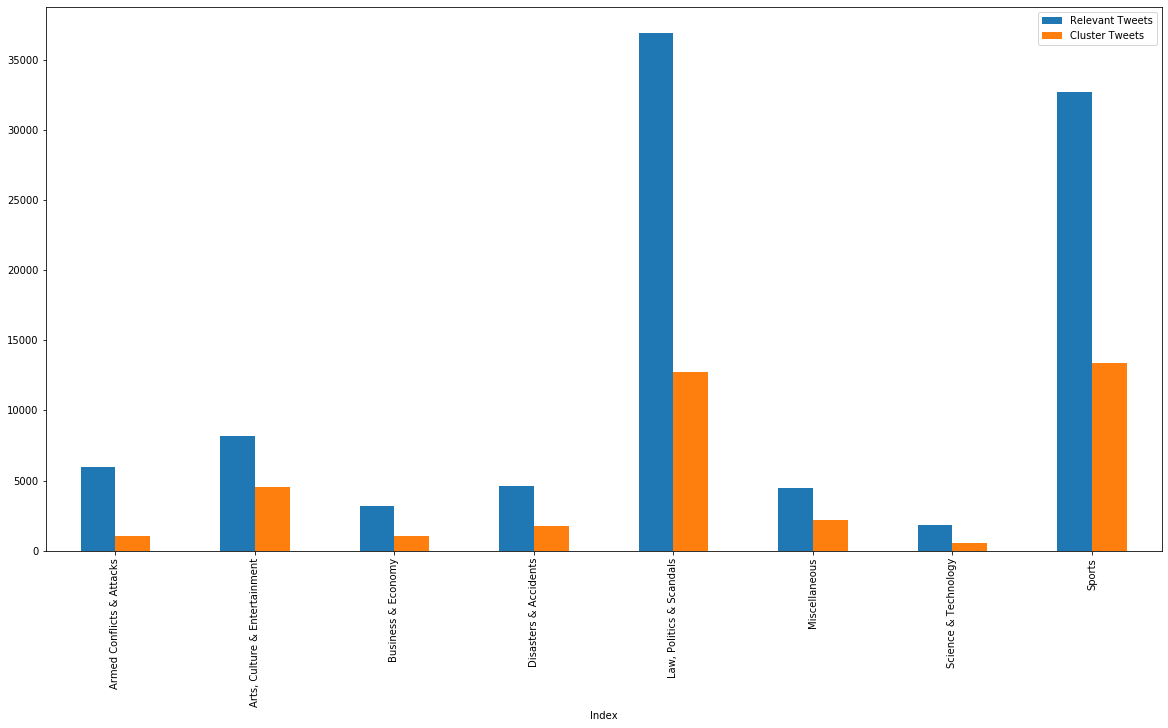

In [9]:
plot_df.plot(kind='bar',figsize=(20,10));

In [10]:
list_events = temp_1.Event.unique().tolist()
df_events = pd.DataFrame(list_events,columns=['Event'])
df_events = pd.merge(df_events, df_categories, how='inner', on=['Event'])

In [11]:
df_events.groupby(['Category']).count()

,Event
Category,
Armed Conflicts & Attacks,56
"Arts, Culture & Entertainment",29
Business & Economy,13
Disasters & Accidents,21
"Law, Politics & Scandals",85
Miscellaneous,20
Science & Technology,13
Sports,119


In [12]:
def getLabel(list_event):
    try:
        temp = list_event.value_counts()
        return temp.keys()[0]
    except:
        return -1

def findPurity(temp_df):
    try:
        label = getLabel(temp_df['Event'])
        n1 = temp_df.loc[temp_df['Event']==label].shape[0]
        n2 = temp_df.shape[0]
        return n1/n2
    except:
        return -1

def getDataframePurity(df,list_predict):
    df_purity = pd.DataFrame()
    df_purity['Cluster'] = np.array([cluster for cluster in list_predict])
#     print(df_purity['Cluster'])
    df_purity['Length_Cluster'] = [df.loc[df.Cluster==temp].shape[0] for temp in df_purity['Cluster']]
    df_purity['Predicted_Event'] = np.array([int(getLabel(df.loc[df['Cluster']==cluster]['Event'])) for cluster in list_predict])
    df_purity['Purity'] = np.array([round(findPurity(df.loc[df['Cluster']==cluster]),1) for cluster in list_predict])
    return df_purity

array = df_clusters.groupby(["Cluster"]).count().index.tolist()
df_purity = getDataframePurity(df_clusters,array)

In [13]:
list_preticted = df_purity.loc[df_purity.Predicted_Event!=-1].Predicted_Event.unique().tolist()
df_events_predicted = pd.DataFrame(list_preticted,columns=['Event'])
df_events_predicted = pd.merge(df_events_predicted, df_categories, how='inner', on=['Event'])
df_events_predicted = df_events_predicted.rename(columns={"Event":"Predicted Event"})

df_events_predicted.groupby(['Category']).count()

,Predicted Event
Category,
Armed Conflicts & Attacks,45
"Arts, Culture & Entertainment",28
Business & Economy,11
Disasters & Accidents,20
"Law, Politics & Scandals",72
Miscellaneous,20
Science & Technology,10
Sports,109


In [14]:
temp_events_category = df_events.groupby(['Category']).count()
temp_events_category['Predicted Event'] = df_events_predicted.groupby(['Category']).count()['Predicted Event'].tolist()

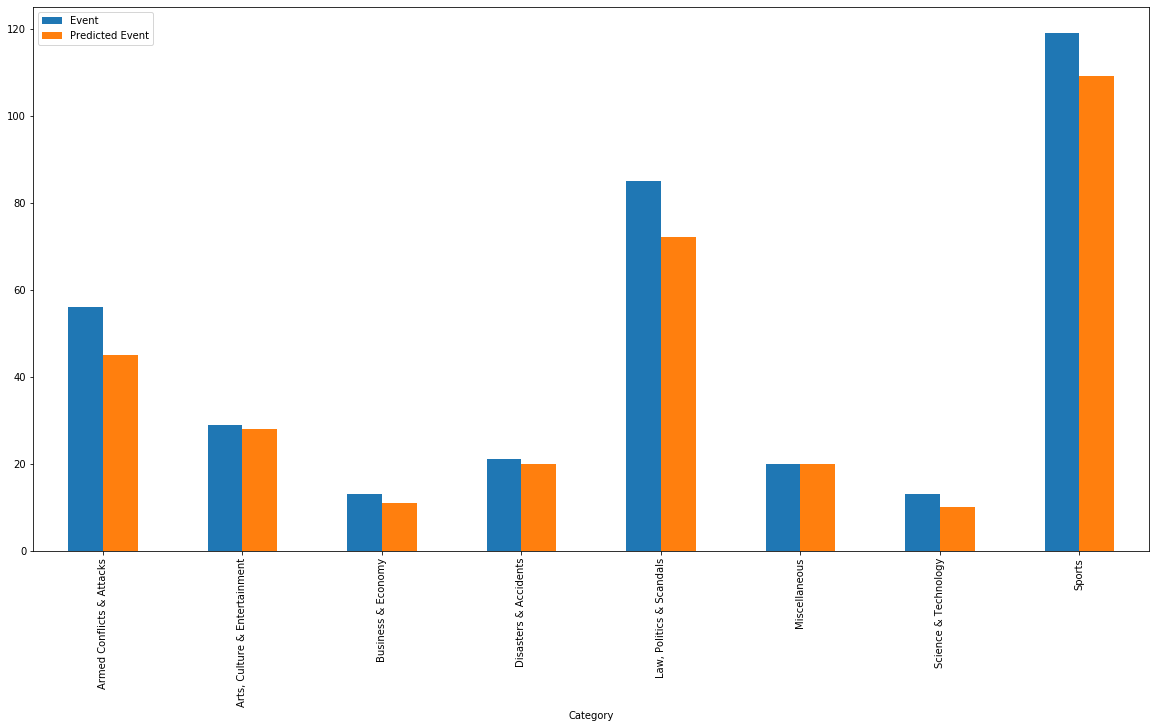

In [15]:
temp_events_category.plot(kind='bar',figsize=(20,10));